<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "green">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, reklama5.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>What data you will be extracting and why?</li>
<li>Add a screenshot of the web-site that you will be scraping</li>



I will be extracting data from the website meta.mk, specifically in the category of ctrl-z, about the recent innovations around the world. The reason i'm extracting this data is to be up to date with all the new innovations. 

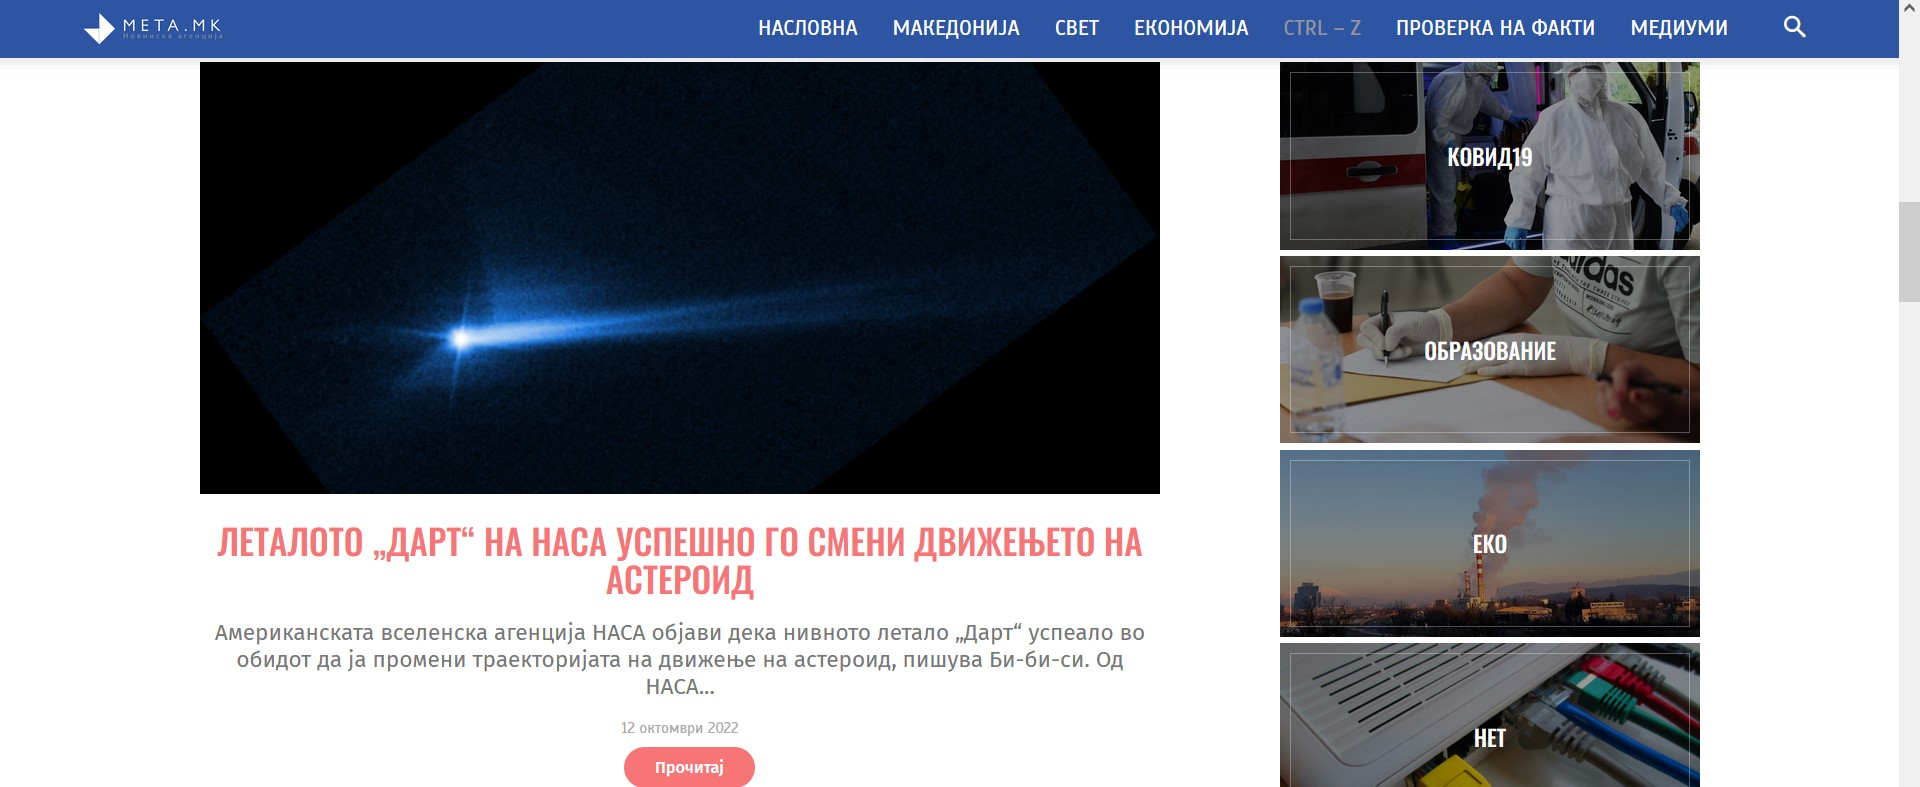

# <font color='Orange'>Requirements specified for Web Scraping</font>


Import all libraries and modules that you are going to use.

In [1]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
from IPython.display import HTML
import warnings

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> 

 **Fetch a website's content - send request**

In [2]:
#add your code
url = 'https://meta.mk/category/ctrl-z/inovacii/'

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [3]:
#add your code
response = requests.get(url)
response

<Response [200]>

In [4]:
type(response)

requests.models.Response

In [5]:
raw_html = response.text
type(raw_html)

str

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [6]:
html = BeautifulSoup(raw_html, "html.parser")

In [7]:
type(html)

bs4.BeautifulSoup

**Print the HTML code that you get**

In [8]:
html.select_one("title")

<title>ИНОВАЦИИ | Meta.mk</title>

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

<font color='red'> You need to extract a minimum of four features (lists/columns) from the web site (example: titles, posting time, comments, likes, ...)</font>

`add your attributes here for building the dataset`
titles, posting time, excerpt, link to post

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [9]:
card_titles = html.select('.td-module-meta-info h3.entry-title.td-module-title a')
len(card_titles)

6

In [10]:
card_titles[0].get_text()

'Леталото „Дарт“ на НАСА успешно го смени движењето на астероид'

In [11]:
HTML(card_titles[0].prettify())

**Add as many codeboxes as you need for selecting all the html elements**

In [12]:
card_times = html.select('.td-module-container .td-module-meta-info span.td-post-date time')
len(card_times)

6

In [13]:
card_times[0].text

'12  октомври  2022'

In [14]:
card_excerpts = html.select('.td-module-container .td-module-meta-info .td-excerpt')
len(card_excerpts)

6

In [15]:
card_excerpts[0].text

'Американската вселенска агенција НАСА објави дека нивното летало „Дарт“ успеало во обидот да ја промени траекторијата на движење на астероид, пишува Би-би-си. Од НАСА...'

In [16]:
card_links = html.select('.td-module-container .td-module-meta-info .td-read-more a')
len(card_links)

6

In [17]:
card_links[0].get('href')

'https://meta.mk/letaloto-dart-na-nasa-uspeshno-go-smeni-dvizhenjeto-na-asteroid/'

**Create lists with the extracted data from the html elements that you selected**

In [18]:
titles = []

for i in range(0, len(card_titles)):
  titles.append(card_titles[i].text)


In [19]:
times = []

for i in range(0, len(card_times)):
  times.append(card_times[i].text)

In [20]:
excerpts = []

for i in range(0, len(card_excerpts)):
  excerpts.append(card_excerpts[i].text)

In [21]:
links = []

for i in range(0, len(card_links)):
  links.append(card_links[i].get('href'))

**Print all lists that are containing the elements**

In [22]:
titles

['Леталото „Дарт“ на НАСА успешно го смени движењето на астероид',
 'Научниците Бертоци, Мелдал и Шарплес се добитници на Нобеловата награда за хемија',
 'Два тима средношколци ќе одат во НАСА, за првпат жирито избра два победнички тима',
 'Тројца научници ја добија Нобеловата награда за физика',
 'Хеликоптерот „Досетливост“ на НАСА забележал остатоци од чудни туѓи објекти на Марс',
 'На Месечината пронајдени докази за ударот на астероидот на Земјата што ги убил диносаурусите']

In [23]:
times

['12  октомври  2022',
 '5  октомври  2022',
 '5  октомври  2022',
 '4  октомври  2022',
 '3  октомври  2022',
 '29  септември  2022']

In [24]:
excerpts

['Американската вселенска агенција НАСА објави дека нивното летало „Дарт“ успеало во обидот да ја промени траекторијата на движење на астероид, пишува Би-би-си. Од НАСА...',
 'Керолин Р. Бертоци,\xa0Мортен Мелдал\xa0и\xa0К. Бери Шарплес се овогодишните добитници на Нобеловата награда за хемија, објави Нобеловиот комитет, пренесува Гардијан. Со олеснување на комплицираните хемиски...',
 'За првпат во 10 годишното постоење на NASA Space Apps Challenge кај нас, жири комисијата во конкуренција на 5 тимови едногласно одлучи да избере...',
 'Кралската шведска академија на науките одлучи Нобеловата награда за физика за 2022 година да ја додели на тројца научници – Ален Аспект од Франција,...',
 'Снимка од навигациската камера на хеликоптерот „Досетливост“ (Ingenuity) на НАСА на Марс откри мало парче таканаречени „остатоци од туѓ предмет“, пишува „Сајтек Дејли“.\r\n\r\nОстатоците од...',
 'Научници од Австралија проучувајќи примероци од површината на Месечината откриле докази за ударот во Земј

In [25]:
links

['https://meta.mk/letaloto-dart-na-nasa-uspeshno-go-smeni-dvizhenjeto-na-asteroid/',
 'https://meta.mk/nauchnicite-bertoci-meldal-i-sharples-se-dobitnici-na-nobelovata-nagrada-za-hemija/',
 'https://meta.mk/dva-tima-srednoshkolci-kje-odat-vo-nasa-za-prvpat-zhirito-izbra-dva-pobednichki-tima/',
 'https://meta.mk/trojca-nauchnici-ja-dobija-nobelovata-nagrada-za-fizika/',
 'https://meta.mk/helikopterot-dosetlivost-na-nasa-zabelezhal-ostatoci-od-chudni-tugji-objekti-na-mars/',
 'https://meta.mk/na-mesechinata-pronajdeni-dokazi-za-udarot-na-asteroidot-na-zemjata-shto-gi-ubil-dinosaurusite/']

**Check if all lists are the same size**

In [26]:
len(titles) == len(times) 

True

In [27]:
len(excerpts) == len(links)

True

In [28]:
len(times) == len(links)

True

# <font color='Orange'>Create a Pandas DataFrame</font> 


**Create the DataFrame from the lists you get and name your *Columns***

In [29]:
data = []

for i in range(0, len(titles)):
  item = {}
  item['Date'] = times[i]
  item['Title'] = titles[i]
  item['Excerpt'] = excerpts[i]
  item['Link'] = links[i]
  data.append(item)

df = pd.DataFrame(data)

**Print the dataset you obtain**

In [30]:
df.head(len(titles))

,Date,Title,Excerpt,Link
0,12 октомври 2022,Леталото „Дарт“ на НАСА успешно го смени движе...,Американската вселенска агенција НАСА објави д...,https://meta.mk/letaloto-dart-na-nasa-uspeshno...
1,5 октомври 2022,"Научниците Бертоци, Мелдал и Шарплес се добитн...","Керолин Р. Бертоци, Мортен Мелдал и К. Бери Ша...",https://meta.mk/nauchnicite-bertoci-meldal-i-s...
2,5 октомври 2022,"Два тима средношколци ќе одат во НАСА, за првп...",За првпат во 10 годишното постоење на NASA Spa...,https://meta.mk/dva-tima-srednoshkolci-kje-oda...
3,4 октомври 2022,Тројца научници ја добија Нобеловата награда з...,Кралската шведска академија на науките одлучи ...,https://meta.mk/trojca-nauchnici-ja-dobija-nob...
4,3 октомври 2022,Хеликоптерот „Досетливост“ на НАСА забележал о...,Снимка од навигациската камера на хеликоптерот...,https://meta.mk/helikopterot-dosetlivost-na-na...
5,29 септември 2022,На Месечината пронајдени докази за ударот на а...,Научници од Австралија проучувајќи примероци о...,https://meta.mk/na-mesechinata-pronajdeni-doka...


# <font color = 'Green'>Advanced part</font>

<font color = 'orange'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font> 
For the extra task you will need to take a look of the Selenium library. Here is a quick intro to this library and what features it has.

Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.
 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/

Starting code id given below.

<font color ="red"> During the laboratory exercise, will be defined which side and what will need to be extracted using Selenium library</font>



Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [96.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Get:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease [15.9 kB]
Get:14 http:

<html lang="en-US"><head>
    <title>Just a moment...</title>
    <meta http-equiv="Content-Type" content="text/html; charset=UTF-8">
    <meta http-equiv="X-UA-Compatible" content="IE=Edge">
    <meta name="robots" content="noindex,nofollow">
    <meta name="viewport" content="width=device-width,initial-scale=1">
    <link href="/cdn-cgi/styles/challenges.css" rel="stylesheet">
    

<script src="/cdn-cgi/challenge-platform/h/b/orchestrate/managed/v1?ray=76350d2e1cc8ec88"></script><script src="https://cloudflare.hcaptcha.com/1/api.js?endpoint=https%3A%2F%2Fcloudflare.hcaptcha.com&amp;assethost=https%3A%2F%2Fcf-assets.hcaptcha.com&amp;imghost=https%3A%2F%2Fcf-imgs.hcaptcha.com&amp;render=explicit&amp;recaptchacompat=off&amp;onload=_cf_chl_hload"></script></head>
<body class="no-js">
    <div class="main-wrapper" role="main">
    <div class="main-content">
        <h1 class="zone-name-title h1">
            <img class="heading-favicon" src="/favicon.ico" onerror="this.onerror=null;this.
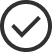

In [31]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results
#divs = wd.find_element(By.TAG_NAME, 'div')